In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
file_path = "/content/drive/MyDrive/Colab Notebooks/train.csv"  # Đổi thành đường dẫn file của bạn
if os.path.exists(file_path):
    print("Tệp tồn tại")
else:
    print("Tệp không tồn tại")

Tệp tồn tại


In [3]:
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

le = LabelEncoder()
y = le.fit_transform(y) # type: ignore
num_classes= len(le.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(20,), name='fully_connected_1'),
    keras.layers.Dense(32, activation='relu', name='fully_connected_2'),
    keras.layers.Dense(num_classes, activation='softmax', name='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fully_connected_1 (Dense)            │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fully_connected_2 (Dense)            │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import json


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64,
          validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

model.save('gesture.keras')

config_dict = {'labels': [str(i) for i in le.classes_]}
with open('./config.json', 'w') as f:
    json.dump(config_dict, f)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.3359 - loss: 1.3647 - val_accuracy: 0.9908 - val_loss: 1.2673
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9886 - loss: 1.2222 - val_accuracy: 0.9917 - val_loss: 1.0450
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9658 - loss: 0.9742 - val_accuracy: 0.9983 - val_loss: 0.7124
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9875 - loss: 0.6484 - val_accuracy: 0.9983 - val_loss: 0.4388
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9947 - loss: 0.4067 - val_accuracy: 0.9983 - val_loss: 0.2836
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9966 - loss: 0.2694 - val_accuracy: 0.9983 - val_loss: 0.1898
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9966 - loss: 0.1777 - val_accuracy: 0.9983 - val_loss: 0.1262
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9950 - loss: 0.1220 - val_accuracy: 0.9983 - val_

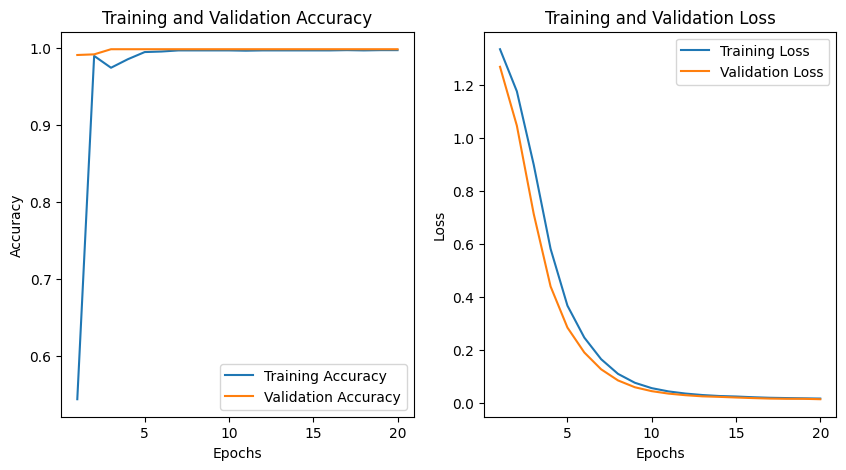

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss,label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('mediapipe_ffn.svg')
plt.show()